In [2]:
import dimers_util 
import numpy as np
import matplotlib.pyplot as plt
import pickle
from importlib import reload 
reload(dimers_util)
from dimers_util import *
import sys

In [49]:
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
d25 = [50, 60, 70, 80]
times = 300
L12 = 100
nums = 5
# H = {'H_ring' : get_h_ring(L12), 'H_hopp' : get_h_hop(L12)}
# classical_evolutions_single2(L12, times, H, d25[0], 1)
# classical_evolution(L12, times, H, d=d25[0], nums=1, steps=False, p=1)
analysis25_1 = parallel_analysis(L12, times, d25, nums)

98 580


In [ ]:
for a,d in zip(analysis25_1, d25):
    plt.plot(a['Mean'], label=d)
plt.legend()

In [ ]:
for a,d in zip(analysis25_1, d25):
    plt.plot(a['speed'], label=d)
plt.legend()

In [ ]:
for a,d in zip(analysis25_1, d25):
    plt.plot(a['acc'], label=d)
plt.legend()
plt.show()

NameError: name 'L12' is not defined

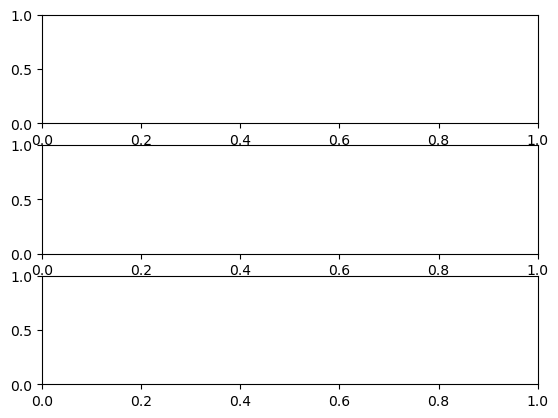

In [3]:
fig, axs = plt.subplots(3)
fig.suptitle('L={}, times={}, nums={}'.format(L12, times, nums))
for a,d in zip(analysis25_1, d25):
    ax[0].plot(a['Mean'], label=d)
ax[0].legend()
ax[0].title("Mean position")

for a,d in zip(analysis25_1, d25):
    ax[1].plot(a['speed'], label=d)
ax[1].legend()
ax[1].title("Speed")

for a,d in zip(analysis25_1, d25):
    ax[2].plot(a['acc'], label=d)
ax[2].legend()
ax[2].title("acceleration")

plt.show()

In [10]:

print(today)

2022_12_12_15_44
